In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('monthly-cola-production-in-austr.csv')
df.head(2)

,Month,Monthly cola production
0,1956-01,93.2
1,1956-02,96.0


In [3]:
df.tail(2)

,Month,Monthly cola production
474,1995-07,119.0
475,1995-08,153.0


In [4]:
# 1. Basic data Check: Date format and No nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    476 non-null    object 
 1   Monthly cola production  476 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.6+ KB


In [5]:
# 2. Visualize and Decompose

df["Month"]=pd.to_datetime(df["Month"])
df.set_index("Month",inplace=True)

In [6]:
df

,Monthly cola production
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9
...,...
1995-04-01,127.0
1995-05-01,151.0
1995-06-01,130.0


<Axes: xlabel='Month'>

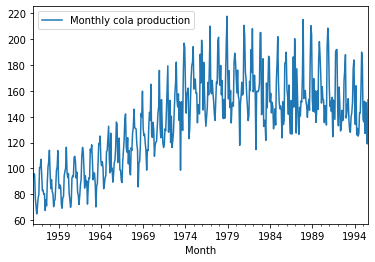

In [7]:
df.plot()

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

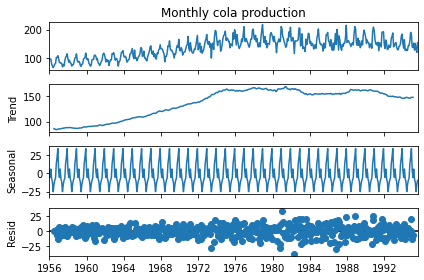

In [9]:
decomposition=seasonal_decompose(df["Monthly cola production"],period=12)
fig=decomposition.plot()

In [10]:
df["Shift"]=df["Monthly cola production"].shift(2)
df["ShiftDiff"]=df["Monthly cola production"]-df["Shift"]

In [11]:
df

,Monthly cola production,Shift,ShiftDiff
Month,,,
1956-01-01,93.2,NaN,NaN
1956-02-01,96.0,NaN,NaN
1956-03-01,95.2,93.2,2.0
1956-04-01,77.1,96.0,-18.9
1956-05-01,70.9,95.2,-24.3
...,...,...,...
1995-04-01,127.0,136.0,-9.0
1995-05-01,151.0,152.0,-1.0
1995-06-01,130.0,127.0,3.0


<ipython-input-12-68d7f76b4dbf>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["rollmean"] = df["Monthly cola production"].rolling(window=12).mean()
<ipython-input-12-68d7f76b4dbf>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["std"]      = df["Monthly cola production"].rolling(window=12).std()


(-2.290351626183919, 0.17509864897133526, 17, 456, {'1%': -3.4447721346720885, '5%': -2.8678991615065095, '10%': -2.570157193174823}, 3450.247917087499)
Test_Statistic             -2.290352
p_value                     0.175099
#lags_used                 17.000000
no of observation used    456.000000
dtype: float64
criticality 1% : -3.4447721346720885
criticality 5% : -2.8678991615065095
criticality 10% : -2.570157193174823
Axes(0.125,0.125;0.775x0.755)
Axes(0.125,0.125;0.775x0.755)


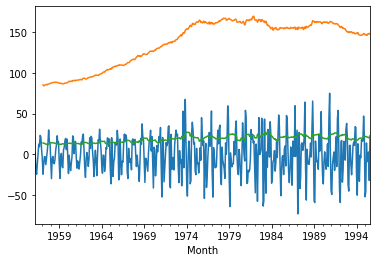

In [12]:
from statsmodels.tsa.stattools import adfuller

def test_statistics(df,var):

    df["rollmean"] = df["Monthly cola production"].rolling(window=12).mean()
    df["std"]      = df["Monthly cola production"].rolling(window=12).std()
    
    adfTest=adfuller(df["Monthly cola production"])
    print(adfTest)
    
    stats=pd.Series(adfTest[0:4], index=["Test_Statistic","p_value","#lags_used","no of observation used"])
    print(stats)
    
    for key,value in adfTest[4].items():
        print("criticality",key,":",value)

    df[var].plot()
    print(df["rollmean"].plot())
    print(df["std"].plot())




test_statistics(df.dropna(),"ShiftDiff")